# 경사하강법이란

- 손실을 줄이는 알고리즘
- 기울기가 0이 되는 점을 찾아서 알맞은 가중치를 찾아내는 것
- 손실함수를 최적화하는 방법중 하나
- 손실 함수의 그래디언트(기울기)를 사용하여 손실을 최소화하는 방향으로 가중치를 조절하는 것

**점진적 학습 or 온라인 학습**
- 머신러닝 모델을 학습하는 방법
- 머신러닝으로 학습할 데이터가 한번에 만들어지지 않을때, 지속적으로 새로운 데이터가 생성될 때
- 에포크(epoch) : 훈련 세트를 한번 모두 사용하는 과정
- 미니배치 경사 하강법 : 미니배치 크기에 따라 일정한 양의 샘플을 사용해 경사 하강법을 수행하는 방식
- 배치사이즈 : 한번에 학습되는 데이터의 양
- 확률적 경사하강법 : 1개씩 꺼내서 학습
- 미니배치 경사하강법 : 여러개씩 꺼내서 학습
- 배치 경사하강법 : 전체 훈련 데이터 세트를 사용하여 그래디언트를 계산하는 방법

**손실함수(loss function)**
- 실제값과 예측값의 차이
- 비용함수(Cost function)


In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.7 MB/s eta 0:00:00


# 훈련 데이터
- https://bit.ly/fish_csv_data

In [3]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
fish.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [10]:
fish_input = fish.iloc[:,1:].values
fish_target = fish.iloc[:,0].values

print(fish_input.shape, fish_target.shape)

(159, 5) (159,)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 반드시 훈련세트로 학습한 표준화를 이용하여 테스트세트를 표준화한다.
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)


# SGDClassifier
- 확률적 경사하강법을 제공하는 분류용 클래스
- 확률적 경사하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.
- loss : 손실 함수의 종류를 지정하는 매개변수
  - 이진분류회귀 : 이진크로스엔트로피
  - 다중분류회귀 : 크로스엔트로피, 소프트맥스
- max_iter : 반복할 에포크 횟수

In [51]:
from sklearn.linear_model import SGDClassifier
# log - 로지스틱 손실함수
# max_iter = 10, 훈련세트를 10번 반복한다
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 점진적학습(온라인학습)
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8
0.907563025210084
0.925


## partial_fit()을 사용해서 최적의 에포크 횟수 찾는 작업

- 확률적 경사하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.
- 에포크 횟수가 적으면 모델이 훈련세트에 덜 학습을 진행하는 것이다.

In [60]:
sc = SGDClassifier(loss = 'log_loss', random_state=42)

train_score = []
test_score = []

# paritial_fit()만 사용하려면 훈련 세트의 전체 클래스의 레이블이 전달되어야 함
classes = np.unique(train_target)

# 훈련을 반복하여 진행
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

## 에포크 횟수에 따른 정확도 시각화

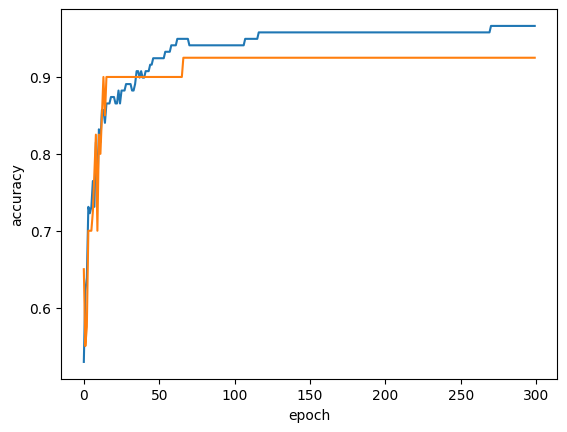

In [55]:
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [59]:
# tol : 향상된 최소값을 지정하는 매개변수, None 값은 횟수만큼 반복
sc = SGDClassifier(loss = 'log_loss', max_iter=50, random_state=42, tol=None)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9243697478991597
0.925
